## Code visibility (relevant for HTML only)
Use the Show/Hide Code button on the top left to make to make the code visible or hide it. It will be hidden in the HTML files by default.

# How to use code cells in this notebook
If a code cell starts with 
```python
# RUN
```
Run the cell by CTRL+Enter, or the Run button above.  

If a code cell starts with
```python
# USER INPUT
```
User input is needed before running the cell. Usually there will be a cell preceding this which gives an example for the values to be provided.

If a code cell starts with
```python
# OPTIONAL USER INPUT
```
User input is needed before running the cell. However, some defaults are provided, so make sure that either the settings will work for your run, or change them appropriately.

If a cell starts with
#### Example cell
These cells are not code cells but examples of user inputs from the test data analysis for the actual code cell that follows it, informing the user about the formatting etc.

**Important note on entering input:** When entering user input, please make sure you follow the formatting provided in the example cells. For example, when the parameter is text, make sure you have quotation marks around the parameters but when it is a number, do not enclose in quotes. If it is a list, then provide a list in brackets.

In [1]:
# RUN
import sys
sys.path.append("/opt/src")
import mip_functions as mip
import probe_summary_generator
import pickle
import json
import copy
import os
import numpy as np
import subprocess
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.lines import Line2D
plt.rcParams['svg.fonttype'] = 'none'
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import allel
wdir = "/opt/analysis/"
data_dir = "/opt/data/"

Classes reloading.
functions reloading


In [34]:
targeted_table = pd.read_csv("targeted_mutation_prevalence.csv",
                             header=list(range(2)), index_col=list(range(4)))
targeted_counts = pd.read_csv("targeted_mutation_counts.csv",
                             header=list(range(2)), index_col=list(range(4)))
k13_prev = pd.read_csv("k13_min5_prev.csv",
                             header=list(range(2)), index_col=list(range(4)))
k13_counts = pd.read_csv("k13_min5_counts.csv",
                             header=list(range(2)), index_col=list(range(4)))

In [35]:
targeted_table.head()

District                                                                Agago  \
Year                                                                     2018   
Gene          Gene ID       Mutation Name           Mutation Position           
PF3D7-1322700 PF3D7_1322700 PF3D7-1322700-Thr236Ile 236                0.0000   
PF3D7-1451200 PF3D7_1451200 PF3D7-1451200-Asn71Asn  71                 0.0000   
PI4K          PF3D7_0419900 PI4K-Ser915Gly          915                0.0000   
Sec14         PF3D7_0626400 Sec14-Asn615Asp         615                0.1379   
atp6          PF3D7_0106300 atp6-Ala623Glu          623                0.0938   

District                                                                    \
Year                                                                  2019   
Gene          Gene ID       Mutation Name           Mutation Position        
PF3D7-1322700 PF3D7_1322700 PF3D7-1322700-Thr236Ile 236                0.0   
PF3D7-1451200 PF3D7_1451200 PF3D7-1451200-Asn71Asn  71                 0.0   
PI4K          PF3D7_0419900 PI4K-Ser915Gly          915                0.0   
Sec14         PF3D7_0626400 Sec14-Asn615Asp         615                0.0   
atp6          PF3D7_0106300 atp6-Ala623Glu          623                0.0   

District                                                              Amolatar  \
Year                                                                      2018   
Gene          Gene ID       Mutation Name           Mutation Position            
PF3D7-1322700 PF3D7_1322700 PF3D7-1322700-Thr236Ile 236                    0.0   
PF3D7-1451200 PF3D7_1451200 PF3D7-1451200-Asn71Asn  71                     0.0   
PI4K          PF3D7_0419900 PI4K-Ser915Gly          915                    0.0   
Sec14         PF3D7_0626400 Sec14-Asn615Asp         615                    0.0   
atp6          PF3D7_0106300 atp6-Ala623Glu          623                    0.0   

District                                                                    \
Year                                                                  2019   
Gene          Gene ID       Mutation Name           Mutation Position        
PF3D7-1322700 PF3D7_1322700 PF3D7-1322700-Thr236Ile 236                0.0   
PF3D7-1451200 PF3D7_1451200 PF3D7-1451200-Asn71Asn  71                 0.0   
PI4K          PF3D7_0419900 PI4K-Ser915Gly          915                0.0   
Sec14         PF3D7_0626400 Sec14-Asn615Asp         615                0.0   
atp6          PF3D7_0106300 atp6-Ala623Glu          623                0.0   

District                                                                 Arua  \
Year                                                                     2018   
Gene          Gene ID       Mutation Name           Mutation Position           
PF3D7-1322700 PF3D7_1322700 PF3D7-1322700-Thr236Ile 236                0.0000   
PF3D7-1451200 PF3D7_1451200 PF3D7-1451200-Asn71Asn  71                 0.0000   
PI4K          PF3D7_0419900 PI4K-Ser915Gly          915                0.0000   
Sec14         PF3D7_0626400 Sec14-Asn615Asp         615                0.0952   
atp6          PF3D7_0106300 atp6-Ala623Glu          623                0.0455   

District                                                                      \
Year                                                                    2019   
Gene          Gene ID       Mutation Name           Mutation Position          
PF3D7-1322700 PF3D7_1322700 PF3D7-1322700-Thr236Ile 236                0.000   
PF3D7-1451200 PF3D7_1451200 PF3D7-1451200-Asn71Asn  71                 0.000   
PI4K          PF3D7_0419900 PI4K-Ser915Gly          915                0.000   
Sec14         PF3D7_0626400 Sec14-Asn615Asp         615                0.125   
atp6          PF3D7_0106300 atp6-Ala623Glu          623                0.000   

District                                                                Hoima  \
Year                                                                     

In [36]:
os.environ['PROJ_LIB'] = "/opt/conda/share/proj/"

import geopandas as gp
from mpl_toolkits.basemap import Basemap

from matplotlib.patches import Polygon

from matplotlib import cm

In [37]:
combined = pd.read_csv("combined_prevalences.csv", index_col=0)
combined.head()

,Gene ID,Gene,Mutation Name,ExonicFunc,AA Change,Targeted,Sample ID,Prevalence,District,Year,Mutation Position
971,PF3D7_0106300,atp6,atp6-Ala623Glu,missense_variant,Ala623Glu,Yes,HO-04-45-uganda-1,0.0,Hoima,2019,623
987,PF3D7_0106300,atp6,atp6-Glu431Lys,missense_variant,Glu431Lys,Yes,HO-04-45-uganda-1,0.0,Hoima,2019,431
1016,PF3D7_0106300,atp6,atp6-Ser769Asn,missense_variant,Ser769Asn,Yes,HO-04-45-uganda-1,0.0,Hoima,2019,769
2509,PF3D7_0417200,dhfr-ts,dhfr-ts-Ala16Val,missense_variant,Ala16Val,Yes,HO-04-45-uganda-1,0.0,Hoima,2019,16
2510,PF3D7_0417200,dhfr-ts,dhfr-ts-Asn51Ile,missense_variant,Asn51Ile,Yes,HO-04-45-uganda-1,1.0,Hoima,2019,51


In [38]:
import matplotlib as mpl
import matplotlib.gridspec as gridspec

In [39]:
average = combined.pivot_table(index=["Year", "District"],
                                      columns="Mutation Name", values="Prevalence")
average.head()

Mutation Name  PF3D7-1322700-Thr236Ile  PF3D7-1451200-Asn71Asn  \
Year District                                                    
2018 Agago                         0.0                0.000000   
     Amolatar                      0.0                0.000000   
     Arua                          0.0                0.000000   
     Hoima                         0.0                0.023256   
     Jinja                         0.0                0.114286   

Mutation Name  PI4K-Ser915Gly  Sec14-Asn615Asp  atp6-Ala623Glu  \
Year District                                                    
2018 Agago                0.0         0.137931        0.093750   
     Amolatar             0.0         0.000000        0.000000   
     Arua                 0.0         0.095238        0.045455   
     Hoima                0.0         0.116279        0.068182   
     Jinja                0.0         0.205882        0.111111   

Mutation Name  atp6-Glu431Lys  atp6-Ser769Asn  crt-Ala220Ser  crt-Arg371Ile  \
Year District                                                                 
2018 Agago           0.250000             0.0       0.035714       0.071429   
     Amolatar        0.000000             0.0            NaN       0.250000   
     Arua            0.238095             0.0       0.000000       0.000000   
     Hoima           0.139535             0.0       0.026316       0.047619   
     Jinja           0.305556             0.0       0.419355       0.406250   

Mutation Name  crt-Asn326Ser  ...  kelch10-Pro623Thr  mcp-Asn252Asp  \
Year District                 ...                                     
2018 Agago               0.0  ...                0.0            0.0   
     Amolatar            0.0  ...                0.0            0.0   
     Arua                0.0  ...                0.0            0.0   
     Hoima               0.0  ...                0.0            0.0   
     Jinja               0.0  ...                0.0            0.0   

Mutation Name  mdr1-Asn1042Asp  mdr1-Asn86Tyr  mdr1-Asp1246Tyr  \
Year District                                                    
2018 Agago                 0.0       0.033333         0.161290   
     Amolatar              0.0       0.000000         0.181818   
     Arua                  0.0       0.000000         0.360000   
     Hoima                 0.0       0.000000         0.068182   
     Jinja                 0.0       0.000000         0.416667   

Mutation Name  mdr1-Ser1034Cys  mdr1-Tyr184Phe  mdr2-Thr484Ile  \
Year District                                                    
2018 Agago                 0.0        0.709677             0.0   
     Amolatar              0.0        0.705882             0.0   
     Arua                  0.0        0.681818             0.0   
     Hoima                 0.0        0.595238             0.0   
     Jinja                 0.0        0.666667             0.0   

Mutation Name  pib7-Cys1484Phe  pph-Val1157Leu  
Year District                                   
2018 Agago            0.035714             0.0  
     Amolatar         0.000000             0.0  
     Arua             0.000000             0.0  
     Hoima            0.000000             0.0  
     Jinja            0.000000             0.0  

[5 rows x 99 columns]

In [40]:
import geopy
locator = geopy.Nominatim(user_agent="myGeocoder")

In [41]:
district_to_coordinate = {}
for d in combined["District"].unique():
    gc = locator.geocode(d + ", Uganda")
    district_to_coordinate[d] = [gc.longitude, gc.latitude]
district_to_coordinate

{'Hoima': [31.133294858081797, 1.4636618499999998],
 'Katakwi': [34.05733891701861, 1.97332855],
 'Jinja': [33.224816860928684, 0.5465468],
 'Koboko': [30.984921016414404, 3.53511975],
 'Agago': [33.38610568947176, 2.9476598000000003],
 'Kasese': [30.004599806192026, 0.1310231],
 'Kaabong': [34.017368275499464, 3.64462295],
 'Amolatar': [32.78574762455729, 1.63912425],
 'Kole': [32.73564161091386, 2.30153545],
 'Lamwo': [32.657627334186714, 3.5248125],
 'Arua': [31.125645307658072, 2.94799145],
 'Kanungu': [29.714233235654667, -0.7063481],
 'Tororo': [34.102686174797185, 0.74074215],
 'Kapchorwa': [34.39616563403531, 1.33106065],
 'Mubende': [31.565925853751075, 0.51606665],
 'Kabale': [30.01668023928206, -1.233921]}

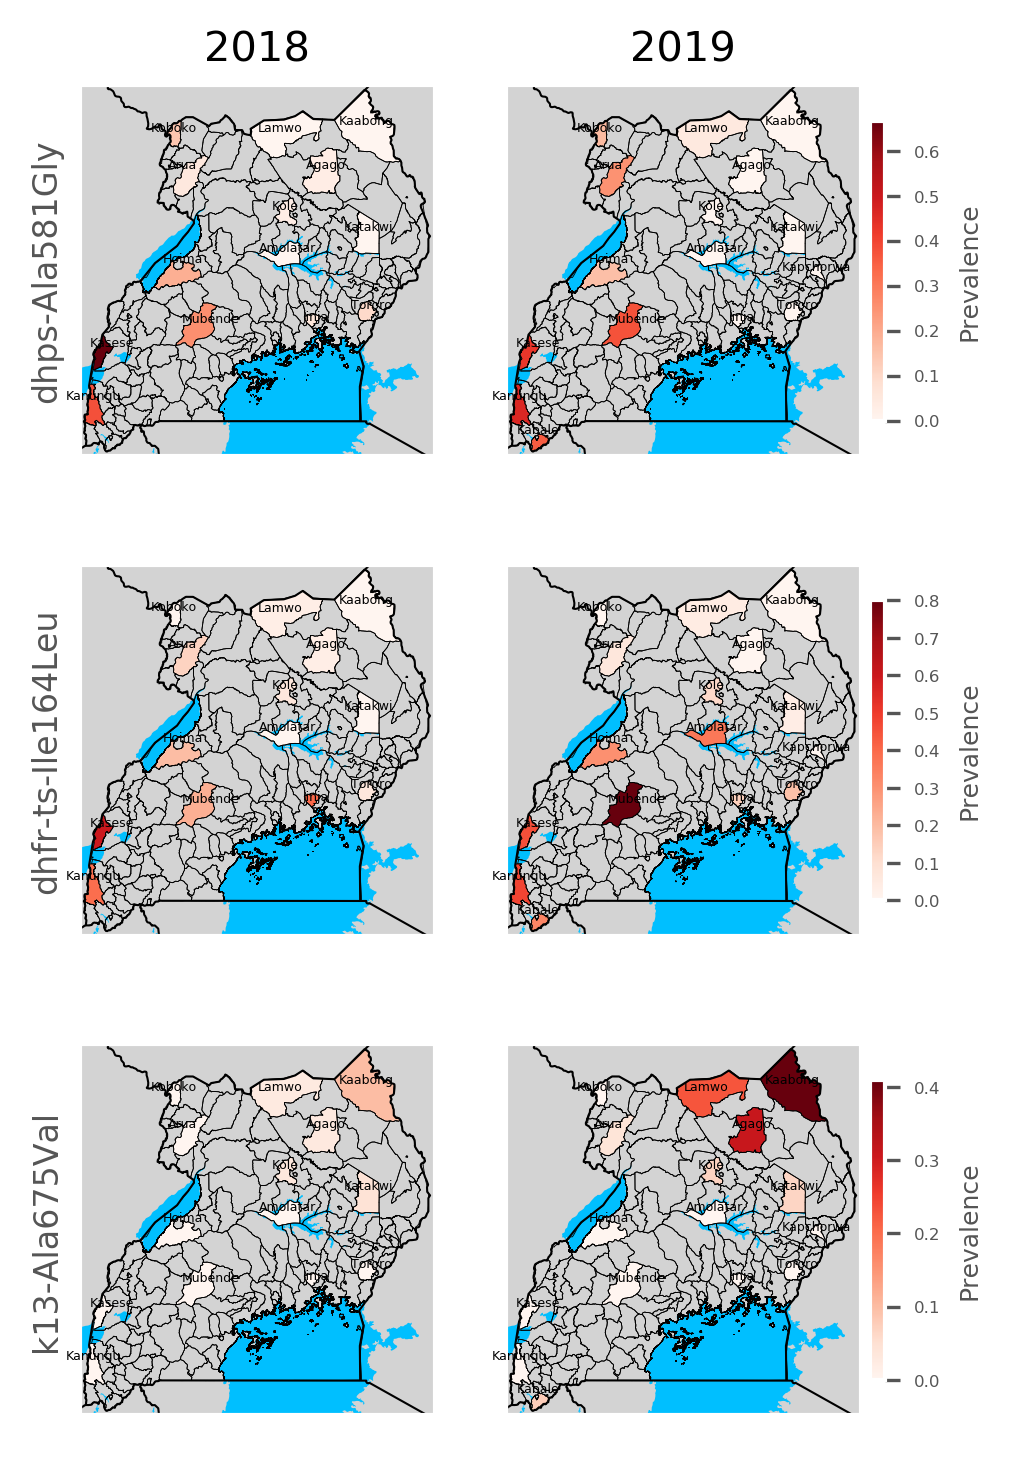

In [42]:
mutations = ["dhps-Ala581Gly", "dhfr-ts-Ile164Leu", "k13-Ala675Val"]
fig, axes = plt.subplots(len(mutations), 2)
years = [2018, 2019]        
for i in range(len(mutations)):
    mut = mutations[i]
    max_value = average[mut].max()
    for j in range(2):
        ax = axes[i, j]
        yr = years[j]
        av = average.loc[yr]
        m_dict = av[mut].to_dict()
        norm = mpl.colors.Normalize(vmin=0, vmax=max_value)

        m = Basemap(llcrnrlat=-1.55, llcrnrlon=29.5, urcrnrlat=4.3, urcrnrlon=35.1,
                   resolution="h", ax=ax)
        shp = m.readshapefile("/opt/data/project_data/gadm36_UGA_2", 'states', drawbounds=True, linewidth=0.2)
        polygons = {}
        for nshape, seg in enumerate(m.states):
            polygons[nshape] = Polygon(seg, aa=True, lw=0.2)
        m.drawcountries()
        m.fillcontinents("lightgrey", lake_color="deepskyblue")
        for d in m_dict:
            for p in polygons:
                poly = polygons[p]
                if poly.contains_point(district_to_coordinate[d]):
                    poly.set_facecolor(cm.get_cmap("Reds")(norm(m_dict[d])))
                    ax.add_patch(poly)
                    ax.text(*district_to_coordinate[d], d.capitalize(),
                            fontsize=3, ha="center",  va="bottom")
                    break
        if j == 1:
            cbar = fig.colorbar(cm.ScalarMappable(cmap=cm.get_cmap("Reds"), norm=norm),
                                ax=axes[i,:], shrink=0.75, pad=0.01)
            cbar.ax.tick_params(labelsize=4) 
            cbar.set_label("Prevalence", fontsize=6, x=0)
            # ax.set_title(mut, fontdict={"fontsize": 8})
            if i == 0:
                ax.set_title(2019, fontdict={"fontsize": 10})
        else:
            ax.set_ylabel(mut, fontdict={"fontsize": 8})
            if i == 0:
                ax.set_title(2018, fontdict={"fontsize": 10})
    fig.set_dpi(300)
    fig.set_size_inches(4, 6)